In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pysal as ps
import mplleaflet

In [3]:
data = gpd.read_file("EMPrankFinal2.shp")

In [4]:
len(set(data['name']))

2064

In [5]:
data.columns

Index([u'BoroCT2010', u'BoroCT20_1',   u'BoroCode',   u'BoroName',
       u'BoroName_1',         u'CD', u'CDEligibil',     u'CT2010',
          u'CTLabel',        u'EMP',    u'NTACode',    u'NTAName',
         u'OBJECTID',       u'PUMA', u'Shape_Ar_1', u'Shape_Area',
       u'Shape_Leng', u'Unnamed__0',          u'X', u'flag_age_1',
       u'flag_agevu', u'flag_com_1', u'flag_commu',   u'flag_emp',
       u'flag_emp_7', u'flag_noi_1', u'flag_noins', u'flag_pop_1',
       u'flag_popde',   u'flag_pov', u'flag_pov_7',   u'flag_sum',
       u'flag_sum_7',       u'fpop',   u'geometry',      u'hhold',
       u'hhold_inco',       u'mpop',       u'name',      u'noins',
          u'pct_EMP', u'pct_age_vu', u'pct_f_vuln', u'pct_m_vuln',
        u'pct_noins',    u'pct_pov', u'popdensity',        u'pov',
         u'rank_EMP', u'rank_agevu', u'rank_commu', u'rank_incom',
       u'rank_noins', u'rank_popde',   u'rank_pov',   u'rank_sum',
             u'temp',   u'totalpop', u'transporta', u'trunctfi

In [6]:
data[data['BoroCode']=='4'].rank_sum

465     316.812015
466     397.141473
467     397.480620
468     395.591085
469     326.744186
470     394.137597
471     275.339147
472     345.106589
473     379.699612
474     289.970930
475     387.063953
476     331.879845
477     268.071705
478     291.036822
479       7.751938
480     373.062015
481     410.804264
482     391.230620
483     348.207364
484     490.552326
485     355.038760
486     421.075581
487     263.759690
488     307.509690
489     315.600775
490     359.447674
491     409.011628
492     356.831395
493     326.550388
494     400.775194
           ...    
1999    316.812015
2000    247.141473
2001    438.614341
2008    124.563954
2009    260.658915
2013    248.255814
2018    228.536822
2019    315.746124
2020    299.951550
2023    279.118217
2024    250.290698
2025    373.837209
2027    392.102713
2028    520.251938
2029    205.717054
2030    120.736434
2031    314.874031
2032    223.594961
2041    336.821705
2042    326.356589
2043    391.472868
2044    388.

In [7]:
psGeom = ps.open('EMPrankFinal2.shp', 'r')

In [8]:
W = ps.buildContiguity(psGeom, criterion='queen', ids=data['BoroCT2010'].values.tolist())

Island ids:  [u'3103400', u'4107201', u'2051600', u'2000100']


In [9]:
W['1015400']

{u'1014402': 1.0,
 u'1014602': 1.0,
 u'1014802': 1.0,
 u'1015200': 1.0,
 u'1015601': 1.0,
 u'1015801': 1.0}

In [10]:
W.transform = 'R'

In [11]:
W['1015400']

{u'1014402': 0.16666666666666666,
 u'1014602': 0.16666666666666666,
 u'1014802': 0.16666666666666666,
 u'1015200': 0.16666666666666666,
 u'1015601': 0.16666666666666666,
 u'1015801': 0.16666666666666666}

In [12]:
Y = data['rank_sum'].values
#Y = (Y-Y.mean())/Y.std() # <<<---- normalization

In [13]:
sl = ps.lag_spatial(W, Y)
data['w_percent'] = sl

In [14]:
mi = ps.Moran(Y, W)
mi.I
mi.p_sim

0.001

In [15]:
mi.I

0.65291456184116536

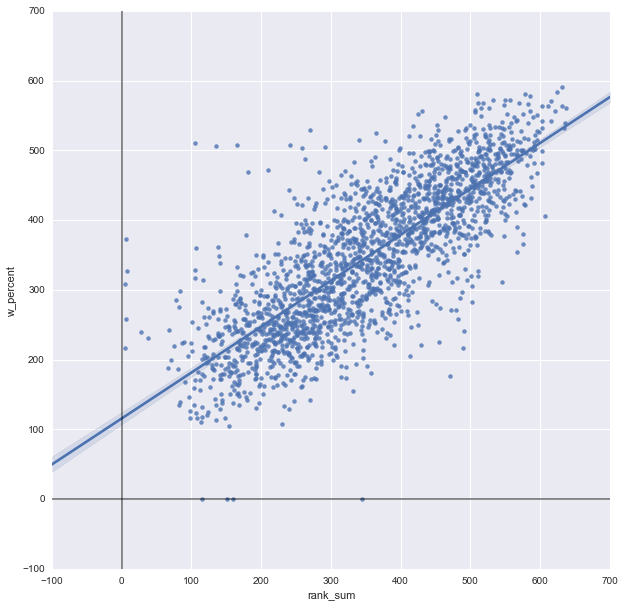

In [16]:
# It's time to look at the Moran Scatter Plot to inspet the results

f, ax = plt.subplots(1, figsize=(10,10))
sns.regplot(x='rank_sum', y='w_percent', data=data)
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.show()

In [27]:
data['w_percent']

0       280.213178
1       226.879845
2       282.170543
3       162.705911
4       198.527132
5       182.400678
6       414.126523
7       391.246770
8       235.887320
9       266.222545
10      230.892684
11      229.408915
12      221.675145
13      155.571705
14      189.310804
15      195.163114
16      204.742006
17      223.525748
18      246.006368
19      208.277962
20      227.575904
21      286.161579
22      282.903343
23      302.609358
24      276.580669
25      280.196221
26      241.965439
27      284.883721
28      352.115633
29      400.629845
           ...    
2034    150.541021
2035    191.230620
2036    206.705426
2037    580.394057
2038    486.875538
2039    484.544574
2040    414.079457
2041    346.899225
2042    368.822674
2043    395.949612
2044    375.179956
2045    362.381568
2046    418.887274
2047    416.986434
2048    340.725360
2049    259.990310
2050    383.169816
2051    323.654177
2052    380.267165
2053    304.872647
2054    310.158269
2055    330.

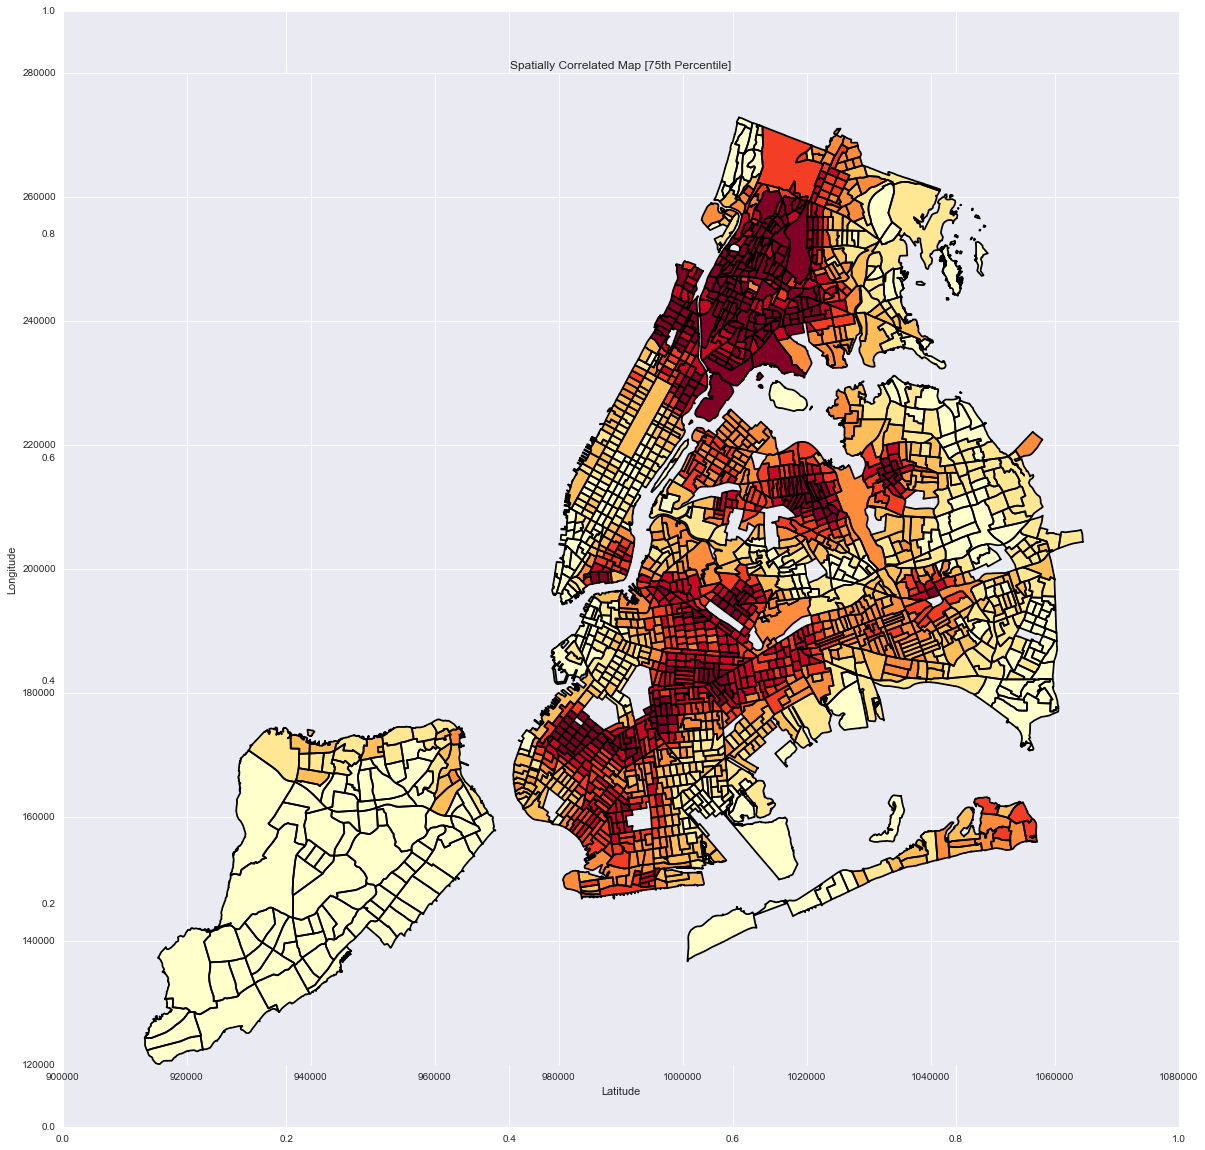

In [34]:
#### THE BELOW CODE SHOULD WORK FOR MOST INSTALLATION
f, ax = plt.subplots(1, figsize=(20,20))
data.plot(column='w_percent', scheme='QUANTILES',k=7, alpha=1, colormap='YlOrRd')
#mplleaflet.display(fig=f, crs=data.crs)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Spatially Correlated Map [75th Percentile]')

#### BUT IF NOT, PLEASE USE THE BELOW INSTEAD (and comment the previous blob)
# data.plot(column='w_percent', scheme='QUANTILES', k=7, alpha=1.0, colormap='YlOrRd', figsize=(10,10))
# mplleaflet.display(crs=data.crs)

In [ ]:
data['Bo']

In [ ]:
data.plot(column='w_percent', scheme='QUANTILES', k=7, alpha=1.0, colormap='YlOrRd')
mplleaflet.display(crs=data.crs)

In [ ]:
data[['BoroCT2010','w_percent']]
set(data['w_percent'])

In [39]:
lisa = ps.Moran_Local(Y, W)

In [40]:
S = lisa.p_sim < 0.05

In [41]:
Q = lisa.q

In [43]:
# Next, we'll turn those into a GeoDataFrame for visualization.

records = map(lambda x: (data.iloc[x]['BoroCT2010'], Q[x], data.geometry.iloc[x]),
              [i for i,s in enumerate(S) if s])


gdata = gpd.GeoDataFrame(records, columns=('BoroCT2010', 'quadrant', 'geometry'))
gdata.head()

,BoroCT2010,quadrant,geometry
0,5012500,3,"POLYGON ((951998.5532226563 168438.0043945313,..."
1,5019700,3,"POLYGON ((947819.2308349609 164190.0209960938,..."
2,5006400,3,"POLYGON ((963023.891784668 158246.7521972656, ..."
3,5007400,3,"POLYGON ((967656.8290405273 155637.1314086914,..."
4,1006800,3,"POLYGON ((989553.9097900391 209596.7955932617,..."


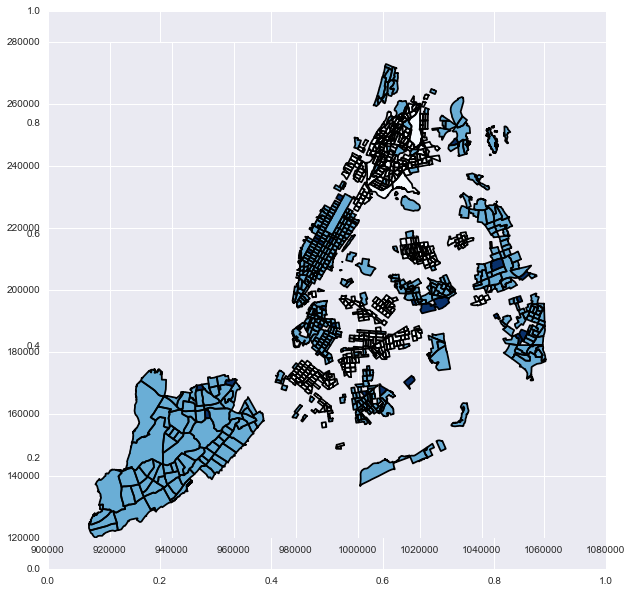

In [44]:
f, ax = plt.subplots(1, figsize=(10,10))
gdata.plot(column='quadrant', scheme='QUANTILES', k=4, alpha=1.0, colormap='Blues')